In [51]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

### Some linearly correlated data (x, y).

In [66]:
n = 100
x = np.random.randn(n)
y = 0.8 * x + np.random.randn(n)

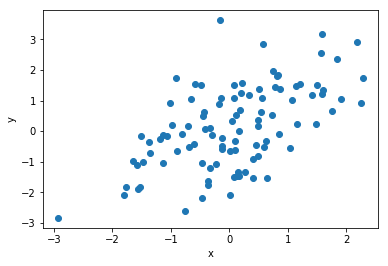

In [67]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

### Compute covariance cov(x, y) and correlation cor(x, y) by hand. Compare to NumPy results.

In [68]:
np_cov = np.cov(x, y)
np_cor = np.corrcoef(x, y)

print(np_cov)
print()
print(np_cor)

[[1.04180441 0.78753818]
 [0.78753818 1.8277257 ]]

[[1.        0.5707199]
 [0.5707199 1.       ]]


### Generate a plot of correlation vs. slope factor ($\beta_1$) for randomly generated $x$ and $y$ as above for slopes between -10 and 10. Also plot the data for slopes -10, -1, 0, 1, and 10. Don't overwrite the original $x$, $y$ data.

### For the original simulated data at the top, compute the slope and intercept of the ordinary least squares (OLS) fit line using analytical formulas. These should be one-liners using NumPy! Plot the fit overlaid on the data.

### Plot the fit residuals (data - fit).

### For the original simulated data at the top, plot the residual sum of sqaures (RSS or SSE) from the least squares fit line for slopes between 0 and 2. Use enough points ot make the curve smooth.

### Compute analytical estimates for the standard error of the slope and intercept estimates. Use these to construct 95% confidence intervals for the slope and intercept parameters.

### Test the hypothesis that there is a relation between $x$ and $y$. Write down null and alternative hypothesis and compute a p-value. Then either do or do not reject the null hypothesis.

### Compute the $R^2$ value for the least squares fit. What does this tell you?

### Compute the 95% confidence interval for the least squares fit line at 100 equally spaced values of $x$ spanning the range of observations. Plot the data and fit with the 95% confidence interval of the fit shown as a shaded area.

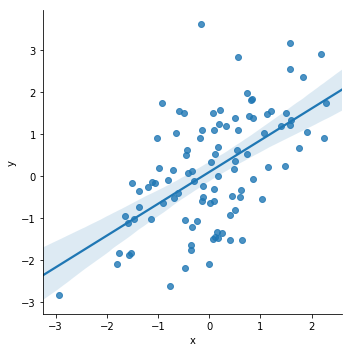

In [69]:
data = pd.DataFrame({'x': x, 'y': y})
sns.lmplot(x='x', y='y', data=data);

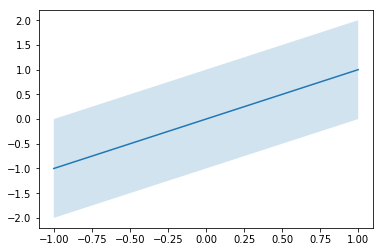

In [70]:
x_ = [-1, 1]
y_ = [-1, 1]
y_l = [-2, 0]
y_u = [0, 2]
plt.plot(x_, y_)
plt.fill_between(x_, y_l, y_u, alpha=0.2);

### Perform OLS using NumPy for $y = \beta_1 x$.

In [71]:
X = x.reshape((100, 1))
beta, res, rank, sing = np.linalg.lstsq(X, y, rcond=None)
print(beta) # these are the weights
print(res) # these are the residuals (squared error after fitting)
print(rank) # the rank (how many non-dependent variables in x)
print(sing) # and the singular values (tell us about stability)

[0.76159514]
[122.91674707]
1
[10.17420744]


### Plot data overlaid with best fit from above.

### Perform OLS using NumPy for $y = \beta_0 + \beta_1 x$.

In [73]:
Xc = np.vstack([np.ones((100,)), x]).T
beta, res, rank, sing = np.linalg.lstsq(Xc, y, rcond=None)
print(beta) # these are the weights
print(res) # these are the residuals (squared error after fitting)
print(rank) # the rank (how many non-dependent variables in x)
print(sing) # and the singular values (tell us about stability)

[0.09553999 0.75593669]
[122.0072725]
2
[10.39879152  9.76624964]


### Plot data overlaid with best fit from above.

### Perform OLS using StatsModels for $y = \beta_1 x$.

In [74]:
model = sm.OLS(y, X)
results = model.fit()
print(results.params)
print(results.HC0_se)
print((results.resid**2).sum())
print(results.ssr)
print(results.rsquared)
print(results.summary())

[0.76159514]
[0.08441185]
122.91674706618191
122.91674706618191
0.3281694747170648
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     48.36
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           3.85e-10
Time:                        10:52:06   Log-Likelihood:                -152.21
No. Observations:                 100   AIC:                             306.4
Df Residuals:                      99   BIC:                             309.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

### Plot data overlaid with best fit from above.

### Perform OLS using StatsModels for $y = \beta_0 + \beta_1 x$.

In [76]:
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc)
results = model.fit()
print(results.params)
print(results.HC0_se)
print((results.resid**2).sum())
print(results.ssr)
print(results.rsquared)
print(results.summary())

[0.09553999 0.75593669]
[0.1106222 0.0839733]
122.00727250440556
122.00727250440556
0.32572119942184496
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     47.34
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           5.67e-10
Time:                        10:53:23   Log-Likelihood:                -151.84
No. Observations:                 100   AIC:                             307.7
Df Residuals:                      98   BIC:                             312.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Plot data overlaid with best fit from above.

### Generate 20 random samples of $x$ and $y$ using the same generating formula as above and plot the fit line for each aver the original data (do not overwrite your original data). How do they compare to the 95% confidence interval for the original fit line? How do you interpret this?

### Generate bootstrap confidence intervals for the slope and intercept parameters.

### Compute the leverage of each of your data points and plot the residuals normalized by their standard error vs. the leverage of each data point.

### Problem of correlated errors. Double data. Now errors are correlated. What does this do to confidence intervals?